# **Trabajo Final**: "Diferenciación automática vs. diferencias finitas"
---
##*Redes Neuronales Informadas por Física*                                   
##*Facultad de Ingeniería de la Universidad de Buenos Aires*                                                 
##*David Canal*, Alán Pérez Winter
##*Diciembre 2024*

# **1. Consigna de Trabajo**
---
# **Parte 1:** "Problema lineal"

Resolver las ecuaciones:
$$
\begin{align}
\Delta u &= \sin{\pi x}\sin{\pi y}\,,\quad 0< x <1 \quad 0< y <1\,, \tag{1a}\\
u(0, y) &= u(1, y) = 0\,, \tag{1b}\\
u(x, 0) &= u(x, 1) = 0\,, \tag{1c}
\end{align}
$$
mediante PINN y mediante el método de diferencias finitas en grillas de tamaño:
- 5 x 5 usar una red neuronal [2, 3, 3, 1]
- 10 x 10 usar una red neuronal [2, 5, 5, 1]
- 20 x 20 usar una red neuronal [2, 10, 10, 1]
Comparar ambas soluciones con la solución exacta dada por:
$$
\begin{equation}
u(x, y) = -\dfrac{1}{2\pi^2}\sin{\pi x}\sin{\pi y}
\end{equation}
$$
¿Qué solución es más precisa? ¿Por qué? Repita el experimento utilizando otras arquitecturas.

# **Parte 2:** "Problema no lineal"

Resolver el problema de conducción de calor con término fuente no lineal dado por:
$$
\begin{align}
\Delta u &= 0,5e^u,\quad 0< x <1 \quad 0< y <1\,, \tag{2a}\\
u(0, y) &= u(x, 0) = 0\,; \tag{2b}\\
\frac{\partial u(1, y)}{\partial x} &= \frac{\partial u(x, 1)}{\partial x} = 0\,; \tag{2c}
\end{align}
$$
mediante PINN y mediante el método de diferencias finitas en grillas de tamaño:
- 5 x 5 usar una red neuronal [2, 5, 5, 1]
- 10 x 10 usar una red neuronal [2, 5, 5, 1]
- 20 x 20 usar una red neuronal [2, 5, 5, 1]

Analice y discuta los resultados. repita el proceso, pero utilizando muestreos aleatorios de los puntos de colocación con la misma cantidad de muestras que en el caso de las grillas uniforme. ¿Que observa?.

# **2. Resolución**
---

# **Parte 1**
---

# **(a). Resolución mediante Diferencias Finitas**

El método de diferencias finitas (FDM, por sus siglas en inglés) es una técnica numérica ampliamente utilizada para resolver ecuaciones diferenciales parciales (PDEs) que surgen en problemas de transferencia de calor, dinámica de fluidos, mecánica estructural y muchos otros campos de la ingeniería y las ciencias. Este método discretiza un dominio continuo en una malla o grilla, transformando las ecuaciones diferenciales en un sistema de ecuaciones algebraicas que puede resolverse computacionalmente.

Para resolver nuestro problema numéricamente *FDM*, primero se discretiza el dominio en ${N_x} + 1$ y ${N_y} + 1$ intervalors en los ejes x e y respectivamente. Esto resulta en una grilla con ${N_x*N_y}$ puntos internos (incognitas a encontrar).

La descritización del dominio en ${N_x*N_y}$ puntos de un dominio de nodos ${(x_i,y_j)}$, con ${x_i = i/(N_x + 1)=ih_x, i = 1,...,N_x}$ y ${y_i = j/(N_y + 1)= jh_j, j = 1,...,N_y}$. Si en cada punto se utiliza aproximaciones de las derivadas segundas parciales mediante diferencias centradas de segundo orden, se obtine ${N_x*N_y}$ ecuaciones de la forma:

$$
\begin{equation}
\dfrac{u(x_i - h_x, y_j)-2u(x_i, y_j)+u(x_i + h_x, y_j)}{h_x^2} + \dfrac{u(x_i, y_j-h_y)-2u(x_i, y_j)+u(x_i, y_j+h_x)}{h_y^2} =  \sin{\pi x_i}\sin{\pi y_j}\
\end{equation}
$$
reordernando, tenemos:
$$
\begin{equation}
{h_y^2u_{(i-1,j)} + h_y^2u_{(i+1,j)} +h_x^2u_{(i,j-1)} + h_x^2u_{(i,j+1)} -2(h_x^2+h_y^2)u_{(i,j)}} =  \sin{\pi x_i}\sin{\pi y_j}\; \tag{2d}
\end{equation}
$$

donde $u_{(i,j)} = u(x_i, y_j)$. En los casos en que el punto $(x_i,y_j)$ se encuentre en uno de los bordes, se reemplaran los valores conocidos (por las condiciones de borde) en la ecuación (2d) y se reorganizan.

#### **Utilización de la librería FiPy**
La librería **FiPy**, desarrollada en Python, es una herramienta robusta y eficiente diseñada específicamente para resolver PDEs utilizando métodos basados en diferencias finitas. FiPy permite a los usuarios resolver problemas de contorno con configuraciones personalizadas, soportando ecuaciones de transporte, difusión, reacción y sistemas más complejos.

**Características principales de FiPy**:
1. **Flexibilidad**: Permite definir dominios personalizados, condiciones de contorno y términos fuente de manera explícita.
2. **Automatización**: Discretiza automáticamente el sistema de ecuaciones a partir de las PDEs definidas por el usuario.
3. **Optimización**: Utiliza bibliotecas avanzadas como `NumPy` y `SciPy` para resolver sistemas algebraicos generados por la discretización.
4. **Soporte para geometrías complejas**: Aunque está basado en diferencias finitas, FiPy puede manejar geometrías 1D, 2D y 3D, haciendo ajustes en la malla según sea necesario.

En el contexto del problema, FiPy se utilizó para implementar la ecuación diferencial parcial discretizada según el esquema de diferencias finitas mostrado en la ecuación (2d). Esto incluye:
- La definición del dominio y la malla con $(N_x + 1)$ X $(N_y + 1)$ puntos.
- La incorporación de las condiciones de borde (valores conocidos en los límites del dominio).
- La resolución del sistema de ecuaciones resultante para obtener los valores aproximados de la función en los puntos internos del dominio.

El uso de FiPy facilita no solo la implementación del método numérico, sino también la visualización de los resultados y la flexibilidad para ajustar parámetros como el tamaño de la malla o las condiciones de contorno, permitiendo una exploración más amplia del problema físico en cuestión.

In [1]:
pip install fipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.1/446.1 kB 5.0 MB/s eta 0:00:00


In [95]:
# Importar las librerías necesarias
import numpy as np
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from fipy import CellVariable, Grid2D, DiffusionTerm, Viewer, Variable
from scipy.spatial import cKDTree

In [96]:
# Parámetros del problema
u_ex     = []
u_num    = []
for nx, ny in [(5,5),(10,10),(20,20)]:
  Lx, Ly = 1.0, 1.0  # Dimensiones del dominio
  dx = Lx / nx       # Tamaño de celda en x
  dy = Ly / ny       # Tamaño de celda en y

  # Crear el dominio
  mesh = Grid2D(dx=dx, dy=dy, nx=nx, ny=ny)

  # Definir la variable de solución
  u = CellVariable(name="u", mesh=mesh, value=0.0)

  # Definir la fuente (senoidal) en el problema ∇²u = sin(πx)sin(πy)
  x, y = mesh.cellCenters

  # Change source to be a CellVariable
  source = CellVariable(name='source', mesh=mesh, value=np.sin(np.pi * x) * np.sin(np.pi * y))

  # Definir la ecuación diferencial parcial
  eq = DiffusionTerm(coeff=1.0) == source

  # Aplicar condiciones de frontera u=0 en todo el borde
  u.constrain(0.0, mesh.facesLeft)
  u.constrain(0.0, mesh.facesRight)
  u.constrain(0.0, mesh.facesBottom)
  u.constrain(0.0, mesh.facesTop)

  # Resolver la ecuación
  eq.solve(var=u)
  u_num.append(u)
  # Solución analítica para comparar: u(x, y) = -1/(2π²)sin(πx)sin(πy)
  u_ex.append(-1 / (2 * np.pi**2) * np.sin(np.pi * x) * np.sin(np.pi * y))

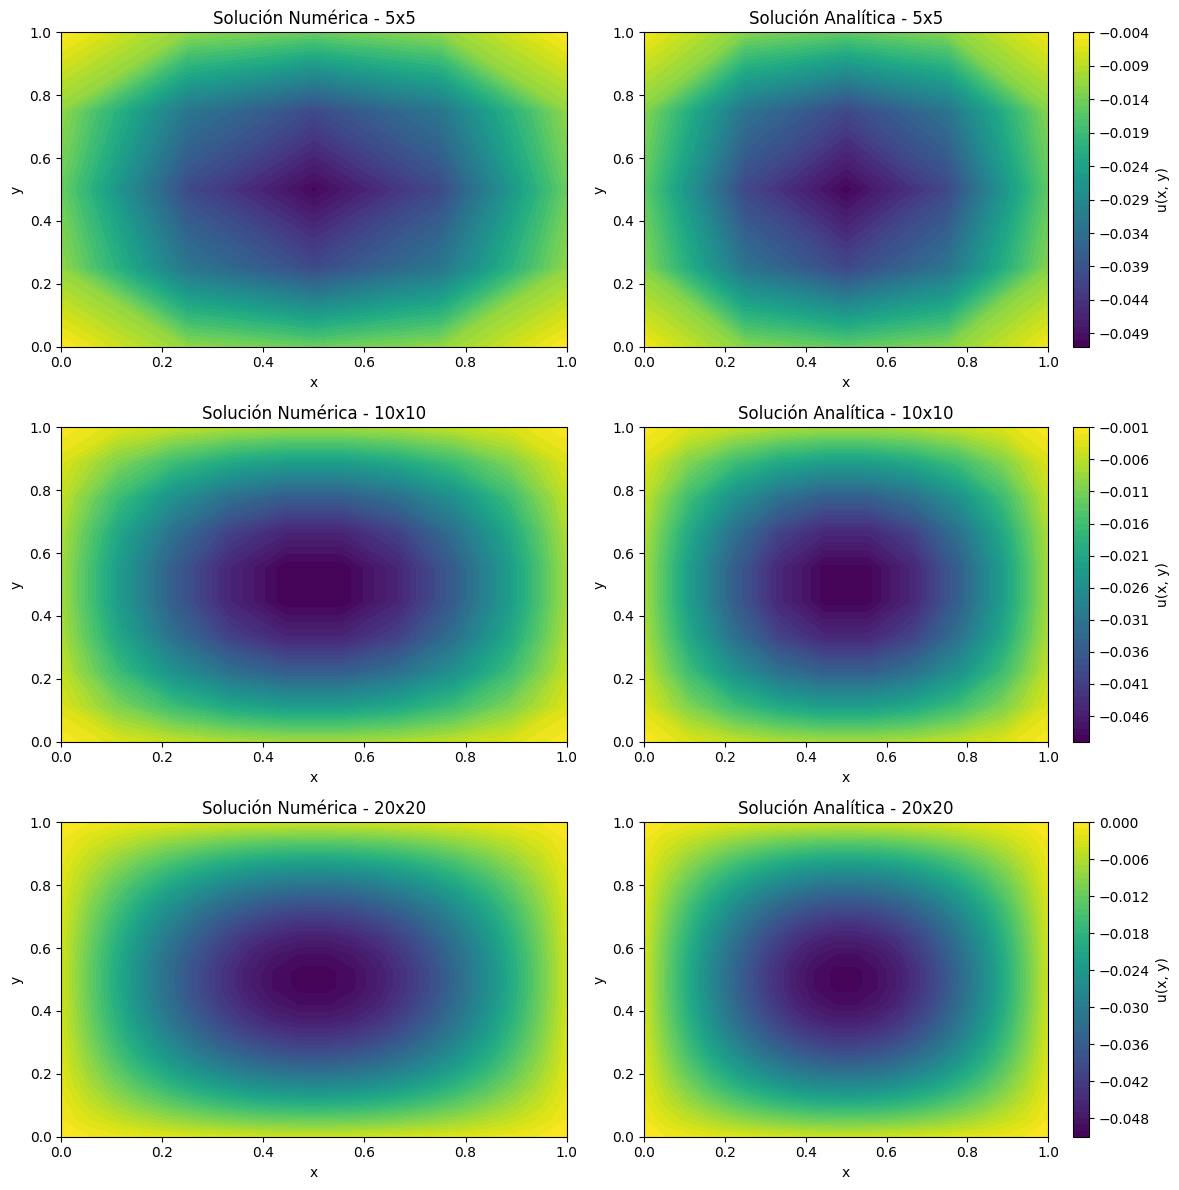

In [97]:
nx = [5, 10, 20]
ny = [5, 10, 20]

# Define Lx and Ly here as well
Lx, Ly = 1.0, 1.0

# Graficar resultados
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
k = 0
for i in range(3):
    j = 0
    # Solución numérica obtenida con FiPy
    contour = ax[i,j].contourf(
      np.reshape(u_num[k].value, (ny[k], nx[k])),
      levels=50,
      cmap="viridis",
      extent=(0, Lx, 0, Ly) # Now Lx and Ly are defined in this scope
    )
    #fig.colorbar(contour, ax=ax[i,j], label="u(x, y)")
    ax[i,j].set_title("Solución Numérica - {}x{}".format(nx[k],ny[k]))
    ax[i,j].set_xlabel("x")
    ax[i,j].set_ylabel("y")

    j += 1
    # Solución analítica
    contour = ax[i, j].contourf(
       np.reshape(u_ex[k], (ny[k], nx[k])),
      levels=50,
      cmap="viridis",
      extent=(0, Lx, 0, Ly)  # Now Lx and Ly are defined in this scope
    )
    fig.colorbar(contour, ax=ax[i,j], label="u(x, y)")
    ax[i,j].set_title("Solución Analítica - {}x{}".format(nx[k],ny[k]))
    ax[i,j].set_xlabel("x")
    ax[i,j].set_ylabel("y")

    k +=1

plt.tight_layout()
plt.show()

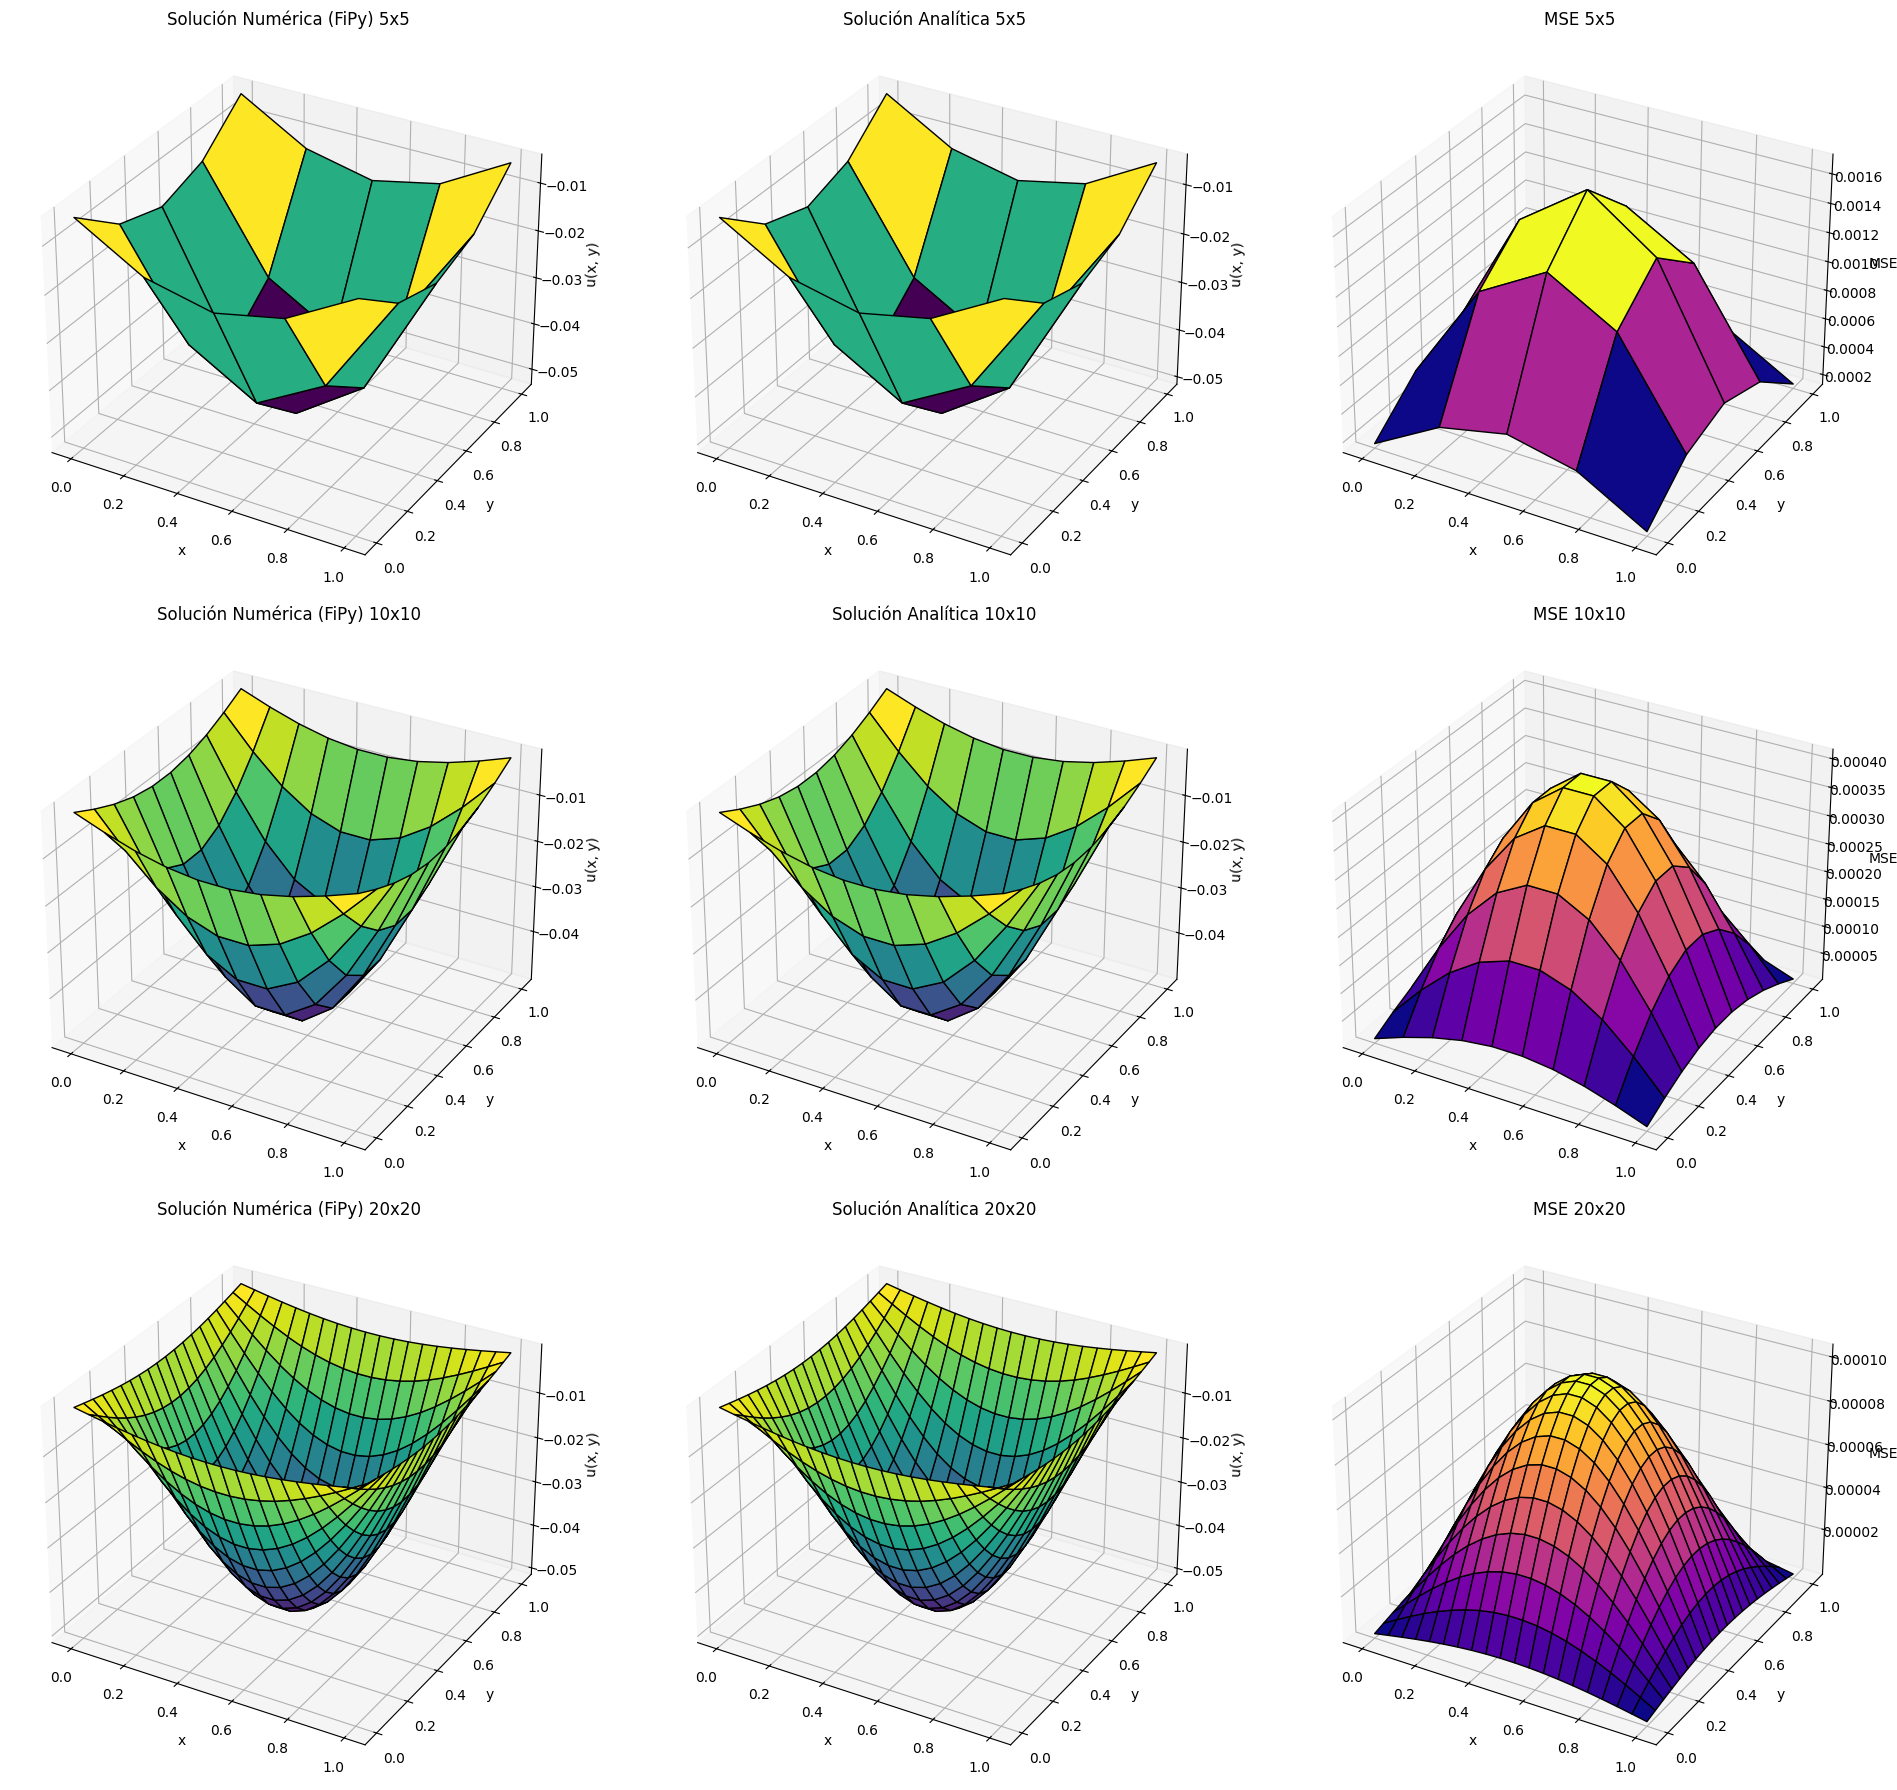

In [98]:
# Crear subgráficos para las soluciones 3D
fig = plt.figure(figsize=(20, 18))
MSE_num = []

for i in range(len(nx)):
    # Crear mallas para la grilla actual
    x_vals = np.linspace(0, Lx, nx[i])
    y_vals = np.linspace(0, Ly, ny[i])
    X, Y = np.meshgrid(x_vals, y_vals)

    # Reshape de las soluciones para gráficos 3D
    u_numeric = np.reshape(u_num[i].value, (ny[i], nx[i]))
    u_exact = np.reshape(u_ex[i], (ny[i], nx[i]))
    error_pointwise = np.sqrt((u_numeric - u_exact) ** 2)
    MSE_num.append(np.mean(error_pointwise))

    # Solución numérica (FiPy)
    ax_num = fig.add_subplot(len(nx), 3, 3 * i + 1, projection='3d')
    ax_num.plot_surface(X, Y, u_numeric, cmap='viridis', edgecolor='k')
    ax_num.set_title(f"Solución Numérica (FiPy) {nx[i]}x{ny[i]}")
    ax_num.set_xlabel("x")
    ax_num.set_ylabel("y")
    ax_num.set_zlabel("u(x, y)")

    # Solución analítica
    ax_exact = fig.add_subplot(len(nx), 3, 3 * i + 2, projection='3d') # Changed to 3 columns and adjusted index
    ax_exact.plot_surface(X, Y, u_exact, cmap='viridis', edgecolor='k')
    ax_exact.set_title(f"Solución Analítica {nx[i]}x{ny[i]}")
    ax_exact.set_xlabel("x")
    ax_exact.set_ylabel("y")
    ax_exact.set_zlabel("u(x, y)")

    # MSE punto a punto
    ax_error= fig.add_subplot(len(nx), 3, 3 * i + 3, projection='3d') # Changed to 3 columns and adjusted index
    ax_error.plot_surface(X, Y, error_pointwise, cmap='plasma', edgecolor='k')
    ax_error.set_title(f"MSE {nx[i]}x{ny[i]}")
    ax_error.set_xlabel("x")
    ax_error.set_ylabel("y")
    ax_error.set_zlabel("MSE")

plt.tight_layout()
plt.show()

# **(b). Resolución por PINN**

El método de **Physics-Informed Neural Networks** (PINNs) es una técnica moderna que combina redes neuronales y ecuaciones diferenciales parciales (PDEs) para resolver problemas de variable de contorno. A diferencia de los métodos numéricos tradicionales como diferencias finitas o elementos finitos, PINNs integran las restricciones físicas del problema directamente en la función de pérdida de una red neuronal, lo que permite modelar soluciones aproximadas de las PDEs.

En este contexto, el método PINN se utiliza para resolver una PDE de segundo orden con condiciones de frontera definidas, como se describe en el problema planteado.

---

### **(b1). Estructura de la Red Neuronal (PINN)**

La arquitectura de la red neuronal utilizada está diseñada para aproximar la solución \( u(x, y) \) de la PDE. La red consiste en:
- **Capas completamente conectadas (Fully Connected Layers)**:
  - La red toma como entrada los puntos en el dominio \((x, y)\) y produce como salida la solución \( u(x, y) \).
  - La activación **Tanh** se usa en cada capa para garantizar que la red pueda modelar relaciones no lineales suaves, cruciales en la solución de PDEs.

- **Entrenamiento**:
  - La red neuronal se entrena minimizando una función de pérdida que combina:
    1. **Residuo de la PDE**:
       - El residuo mide cuánto incumple la solución \( u(x, y) \) la ecuación diferencial. Se calcula derivando la salida de la red respecto a las entradas \((x, y)\) utilizando diferenciación automática de PyTorch.
    2. **Condiciones de borde (Boundary Conditions, BCs)**:
       - Penaliza soluciones que no cumplen las condiciones de borde definidas (\(u = 0\) en los límites).
---

### **(b2). Resolución del Problema con PINNs**

#### **1. Generación de puntos en la malla**
El dominio \([0, 1]x[0, 1]\) se discretiza en una grilla uniforme con puntos internos y de borde. Los puntos internos se utilizan para calcular el residuo de la PDE, mientras que los puntos de borde garantizan que se cumplan las condiciones de contorno.

#### **2. Residuo de la PDE**
El residuo se calcula como:
$
R(x, y) = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} - \sin(\pi x) \sin(\pi y)
$
Utilizando la diferenciación automática de PyTorch, las derivadas se obtienen con respecto a las coordenadas \((x, y)\).

#### **3. Función de pérdida**
La función de pérdida combina:
- **Error en la PDE**: Promedio cuadrático de \( R(x, y) \) en los puntos internos.
- **Error en las condiciones de borde**: Promedio cuadrático de \( u(x, y) \) en los puntos de la frontera.

#### **4. Entrenamiento**
El modelo se entrena utilizando el optimizador Adam durante 8000 épocas. El historial de pérdidas se registra para cada configuración, evaluando la convergencia del modelo.

#### **5. Validación con solución exacta**
La solución exacta $ u(x, y) = -\frac{1}{2\pi^2} \sin(\pi x) \sin(\pi y) $ se usa para evaluar la precisión del modelo. Los resultados obtenidos se comparan visualmente y mediante métricas numéricas.

---

In [9]:
# Actualizar función de pérdida para usar todos los puntos de la grilla
def loss_function_with_grid(model, all_points, exact_values):
    u_pred = model(all_points).squeeze()
    exact_values = torch.tensor(exact_values, dtype=torch.float32)
    loss = torch.mean((u_pred - exact_values) ** 2)
    return loss

# Definir la solución exacta
def exact_solution(x, y):
    return -1 / (2 * np.pi**2) * np.sin(np.pi * x) * np.sin(np.pi * y)

# Definir la función `generate_grid_points`
def generate_grid_points(grid_size):
    x = np.linspace(0, 1, grid_size)
    y = np.linspace(0, 1, grid_size)
    X, Y = np.meshgrid(x, y)
    all_points = np.c_[X.ravel(), Y.ravel()]
    all_points = torch.tensor(all_points, dtype=torch.float32)

    # Identificar puntos de borde
    is_boundary = (all_points[:, 0] == 0) | (all_points[:, 0] == 1) | (all_points[:, 1] == 0) | (all_points[:, 1] == 1)
    boundary_points = all_points[is_boundary]
    internal_points = all_points[~is_boundary]

    return internal_points, boundary_points, all_points, X, Y

# Definir la red neuronal
class PINN(nn.Module):
    def __init__(self, layers):
        super(PINN, self).__init__()
        self.layers = nn.ModuleList()
        for i in range(len(layers) - 1):
            self.layers.append(nn.Linear(layers[i], layers[i + 1]))
        self.activation = nn.Tanh()

    def forward(self, x):
        for i in range(len(self.layers) - 1):
            x = self.activation(self.layers[i](x))
        return self.layers[-1](x)

# Residuo de la PDE
def pde_residual(model, x):
    x.requires_grad_(True)
    inputs = x
    u = model(inputs)
    u_x = torch.autograd.grad(u, x[:, 0], grad_outputs=torch.ones_like(u), create_graph=True)[0]
    u_y = torch.autograd.grad(u, x[:, 1], grad_outputs=torch.ones_like(u), create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x, x[:, 0], grad_outputs=torch.ones_like(u_x), create_graph=True)[0]
    u_yy = torch.autograd.grad(u_y, x[:, 1], grad_outputs=torch.ones_like(u_y), create_graph=True)[0]
    return u_xx + u_yy - torch.sin(np.pi * x[:, 0]) * torch.sin(np.pi * x[:, 1])

# Función de pérdida
def loss_function(model, internal_points, boundary_points):
    # Residuo en los puntos internos
    residual = pde_residual(model, internal_points)
    loss_pde = torch.mean(residual**2)

    # Condiciones de borde
    u_boundary = model(boundary_points)
    loss_bc = torch.mean(u_boundary**2)  # Frontera u = 0

    return loss_pde + loss_bc

# Entrenar el modelo
def train_pinn(model, optimizer, n_epochs, internal_points, boundary_points):
    for epoch in range(n_epochs):
        optimizer.zero_grad()
        loss = loss_function(model, internal_points, boundary_points)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss.item()}")
    return model

In [99]:
# Configuración del problema
grid_size = [5,10,20]
layers = [[2, 5, 5, 1],[2, 10, 10, 1],[2, 20, 20, 1]]  # Estructura de la red neuronal
n_epochs = 8000

In [100]:
# Entrenamos los modelos
u_pinn = []
loss_history = []
for i in range(len(grid_size)):
  print("________________________________________________\n")
  print("Grilla {}x{} - Configuración de {}".format(grid_size[i],grid_size[i],layers[i]))
  print("________________________________________________")

  internal_points, boundary_points, all_points, X, Y = generate_grid_points(grid_size[i])

  # Crear valores exactos para la grilla
  exact_values = exact_solution(X.ravel(), Y.ravel())

  # Reentrenar el modelo con los ajustes
  model = PINN(layers[i])
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

  # Lista temporal para almacenar las pérdidas de esta arquitectura
  current_loss_history = []

  for epoch in range(n_epochs):
      optimizer.zero_grad()
      loss = loss_function_with_grid(model, all_points, exact_values.ravel())
      loss.backward()
      optimizer.step()

      # Guardar la pérdida en cada época
      current_loss_history.append((epoch, loss.item()))

      if epoch % 100 == 0:
          print(f"Epoch {epoch}: Loss = {loss.item()}")

  # Guardar el historial de pérdidas de esta arquitectura
  loss_history.append(current_loss_history)

  # Evaluar nuevamente el modelo en la grilla
  u_pred_adjusted = model(all_points).detach().numpy().reshape(grid_size[i], grid_size[i])
  u_pinn.append(u_pred_adjusted)

________________________________________________

Grilla 5x5 - Configuración de [2, 5, 5, 1]
________________________________________________
Epoch 0: Loss = 0.059046827256679535
Epoch 100: Loss = 0.002560012973845005
Epoch 200: Loss = 0.0010577483335509896
Epoch 300: Loss = 0.0004984159604646266
Epoch 400: Loss = 0.00036576695856638253
Epoch 500: Loss = 0.0003491631068754941
Epoch 600: Loss = 0.00034133755252696574
Epoch 700: Loss = 0.00033377186628058553
Epoch 800: Loss = 0.000326341949403286
Epoch 900: Loss = 0.00031908584060147405
Epoch 1000: Loss = 0.0003120086621493101
Epoch 1100: Loss = 0.0003050916420761496
Epoch 1200: Loss = 0.000298297411063686
Epoch 1300: Loss = 0.0002915732329711318
Epoch 1400: Loss = 0.0002848547010216862
Epoch 1500: Loss = 0.00027806402067653835
Epoch 1600: Loss = 0.00027111079543828964
Epoch 1700: Loss = 0.0002638860314618796
Epoch 1800: Loss = 0.00025625343550927937
Epoch 1900: Loss = 0.00024803404812701046
Epoch 2000: Loss = 0.00023897748906165361
Epoc

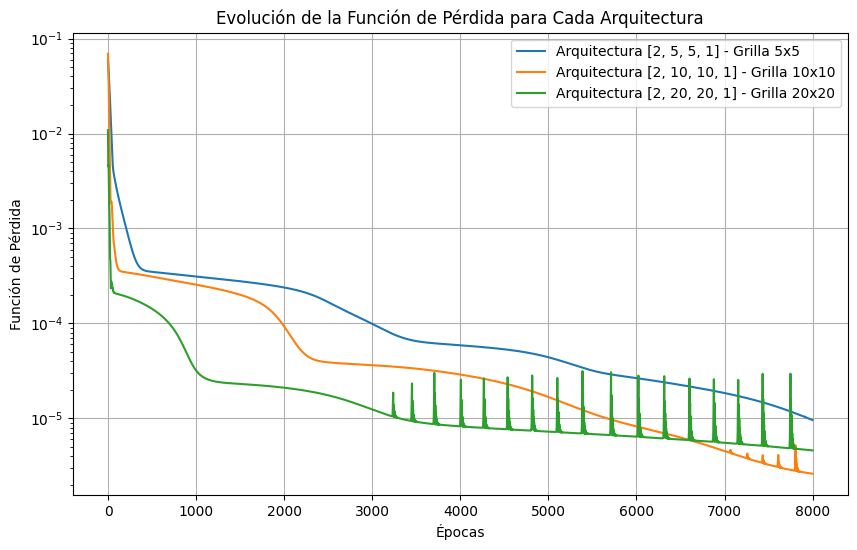

In [101]:
plt.figure(figsize=(10, 6))
for i, loss_data in enumerate(loss_history):
    epochs, losses = zip(*loss_data)  # Separar épocas y pérdidas
    plt.semilogy(epochs, losses, label=f"Arquitectura {layers[i]} - Grilla {grid_size[i]}x{grid_size[i]}")

plt.xlabel("Épocas")
plt.ylabel("Función de Pérdida")
plt.title("Evolución de la Función de Pérdida para Cada Arquitectura")
plt.legend()
plt.grid(True)
plt.show()

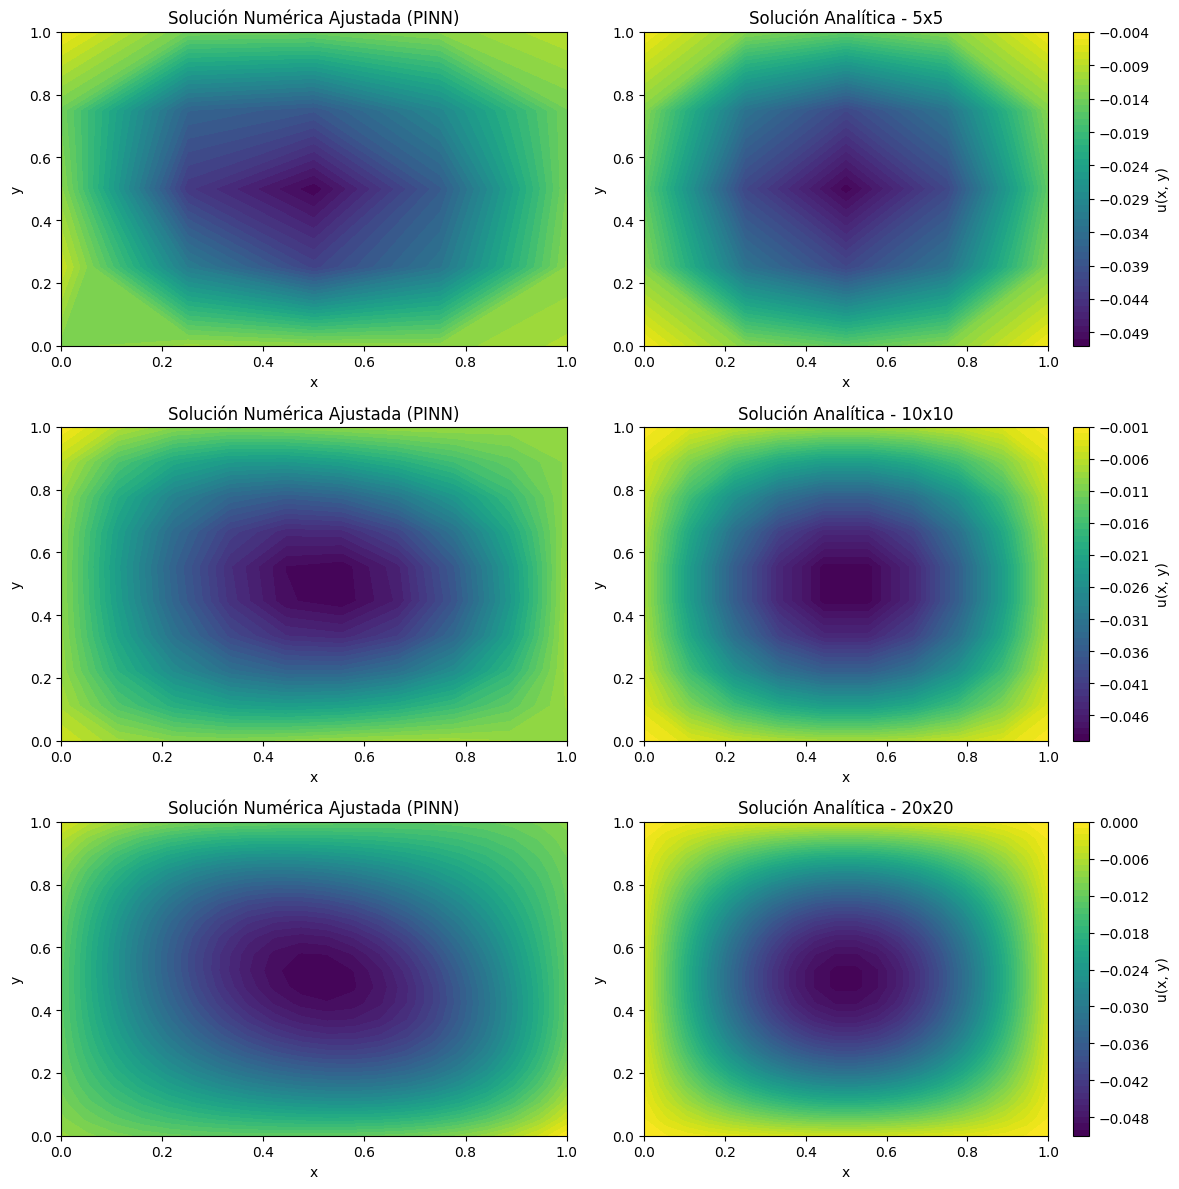

In [102]:
# Graficar resultados
fig, ax = plt.subplots(3, 2, figsize=(12, 12))
k = 0
for i in range(3):
    j = 0
    # **Recalculate X and Y for the current grid size**
    x = np.linspace(0, Lx, nx[k])  # Use Lx for x range
    y = np.linspace(0, Ly, ny[k])  # Use Ly for y range
    X, Y = np.meshgrid(x, y)

    # Solución numérica obtenida con FiPy
    contourf = ax[i,j].contourf(X, Y, u_pinn[k], levels=50, cmap="viridis")
    # Call colorbar on the figure and pass the contourf object
    ax[i,j].set_title("Solución Numérica Ajustada (PINN)")
    ax[i,j].set_xlabel("x")
    ax[i,j].set_ylabel("y")

    j += 1
    # Solución analítica
    contour = ax[i, j].contourf(
       np.reshape(u_ex[k], (ny[k], nx[k])),
      levels=50,
      cmap="viridis",
      extent=(0, Lx, 0, Ly)
    )
    fig.colorbar(contour, ax=ax[i,j], label="u(x, y)")
    ax[i,j].set_title("Solución Analítica - {}x{}".format(nx[k],ny[k]))
    ax[i,j].set_xlabel("x")
    ax[i,j].set_ylabel("y")

    k +=1

plt.tight_layout()
plt.show()

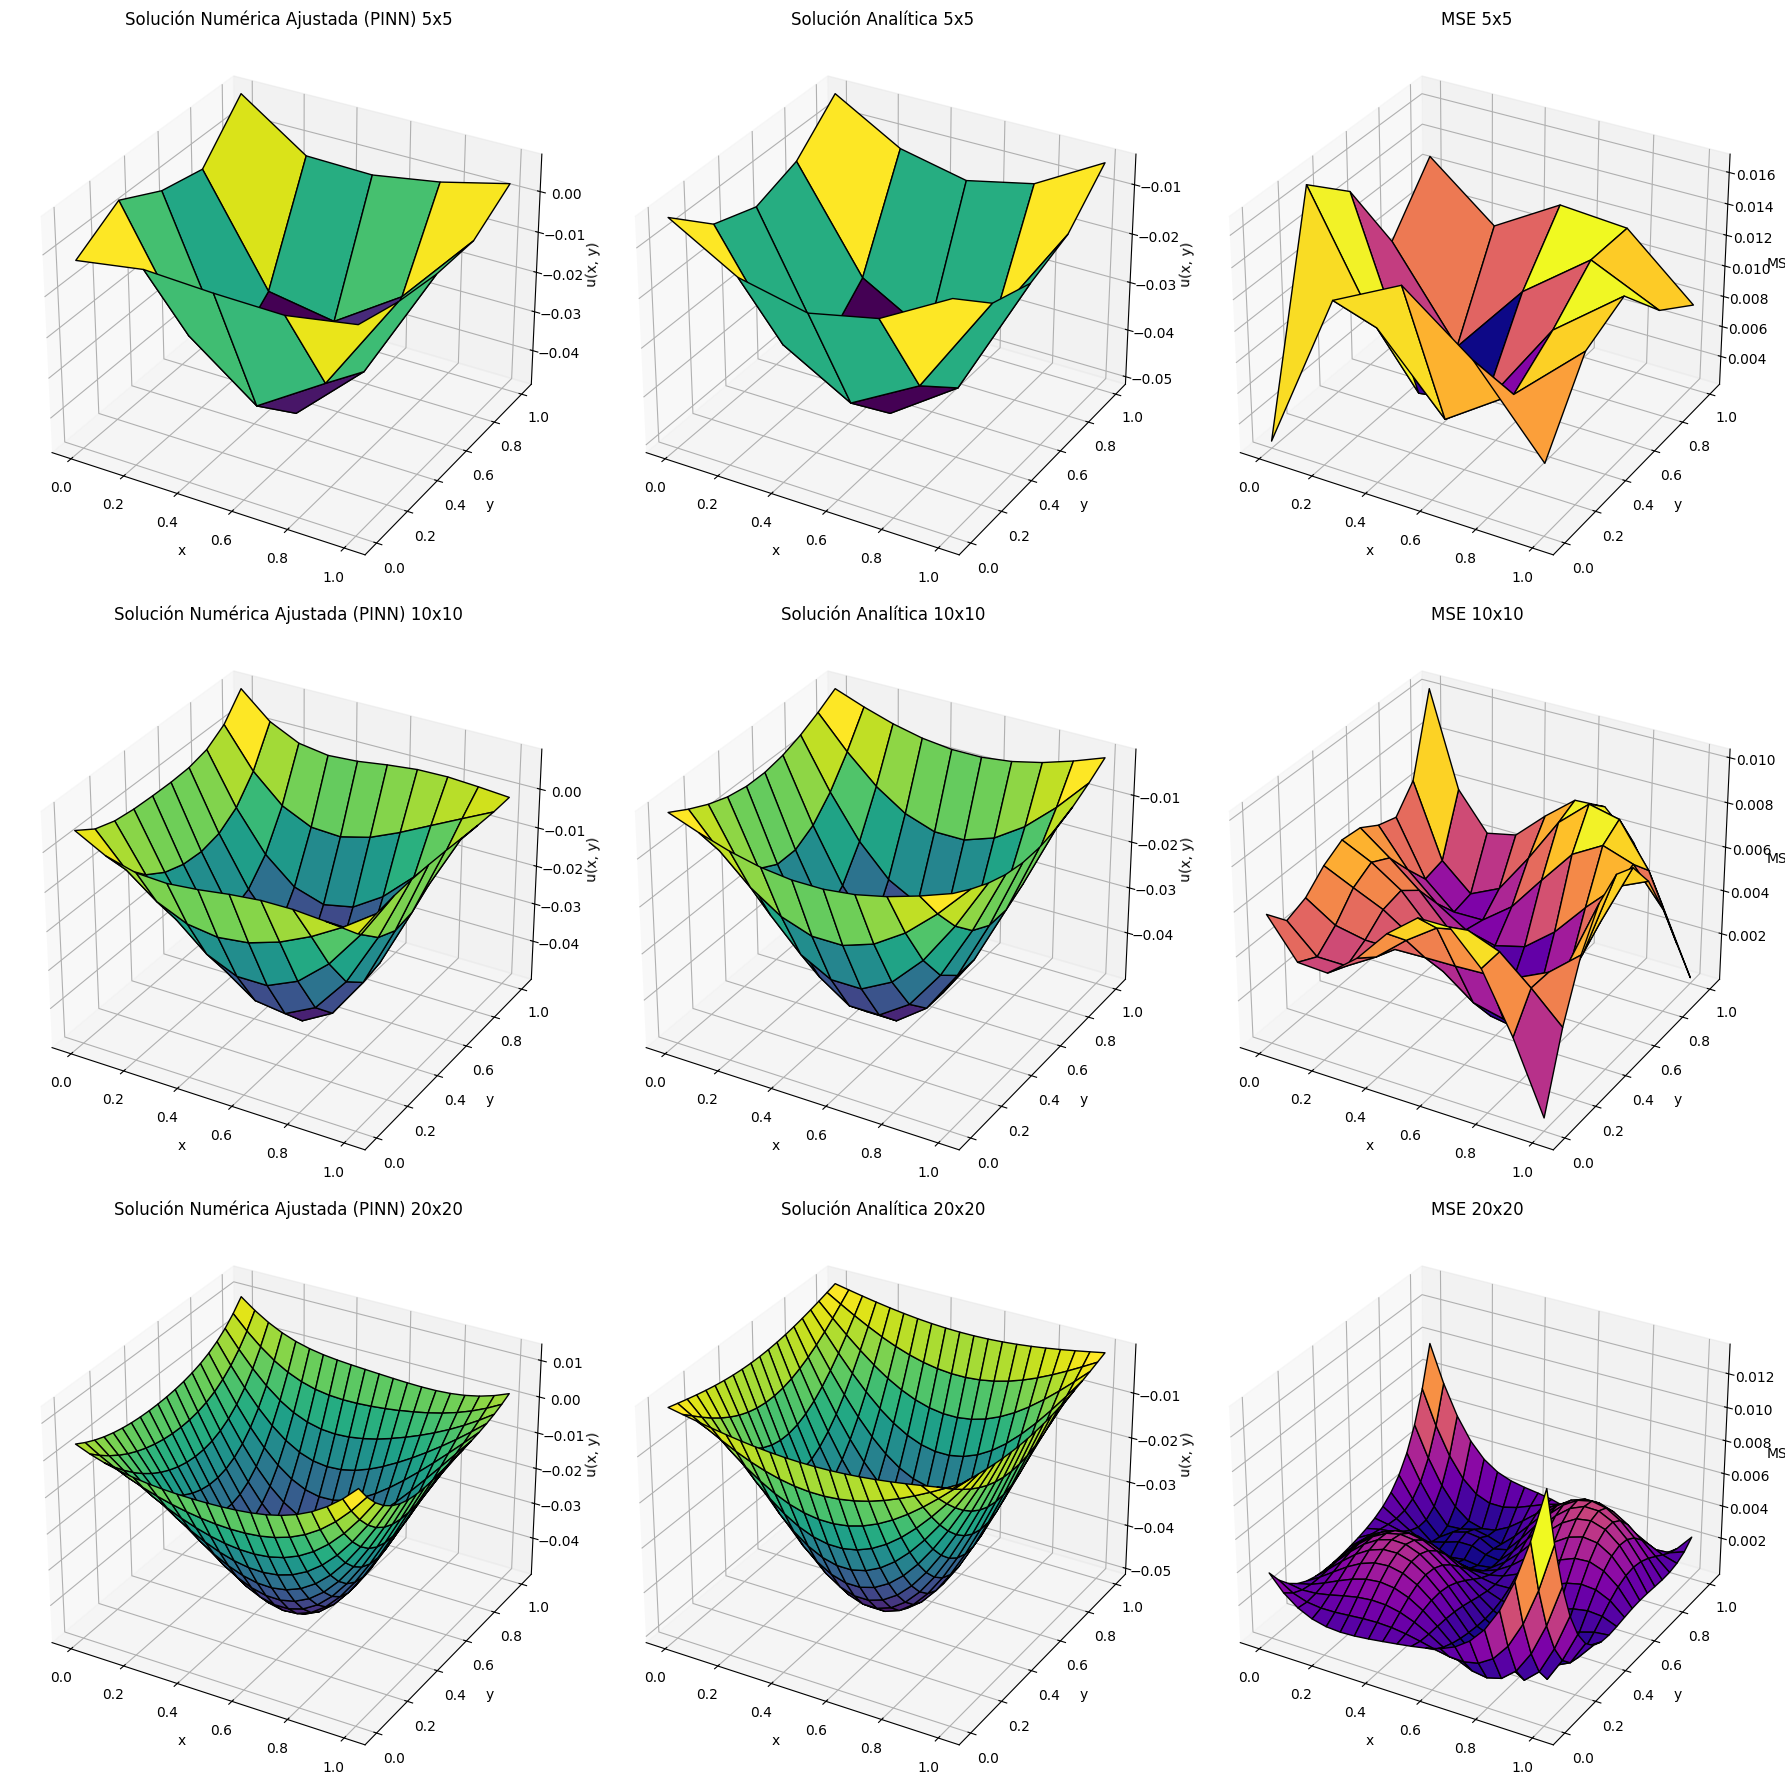

In [103]:
# Crear subgráficos para las soluciones 3D
fig = plt.figure(figsize=(18, 18))

for i in range(len(nx)):
    # Crear mallas para la grilla actual
    x_vals = np.linspace(0, Lx, nx[i])
    y_vals = np.linspace(0, Ly, ny[i])
    X, Y = np.meshgrid(x_vals, y_vals)

    # Reshape de las soluciones para gráficos 3D
    u_PINN = np.reshape(u_pinn[i], (ny[i], nx[i]))
    u_exact = np.reshape(u_ex[i], (ny[i], nx[i]))
    error_pointwise = np.sqrt((u_PINN - u_exact) ** 2)

    # Solución Numérica Ajustada (PINN)
    ax_pinn = fig.add_subplot(len(nx), 3, 3 * i + 1, projection='3d') # Changed to 3 columns and adjusted index
    ax_pinn.plot_surface(X, Y, u_PINN, cmap='viridis', edgecolor='k')
    ax_pinn.set_title(f"Solución Numérica Ajustada (PINN) {nx[i]}x{ny[i]}")
    ax_pinn.set_xlabel("x")
    ax_pinn.set_ylabel("y")
    ax_pinn.set_zlabel("u(x, y)")

    # Solución analítica
    ax_exact = fig.add_subplot(len(nx), 3, 3 * i + 2, projection='3d') # Changed to 3 columns and adjusted index
    ax_exact.plot_surface(X, Y, u_exact, cmap='viridis', edgecolor='k')
    ax_exact.set_title(f"Solución Analítica {nx[i]}x{ny[i]}")
    ax_exact.set_xlabel("x")
    ax_exact.set_ylabel("y")
    ax_exact.set_zlabel("u(x, y)")

    # MSE punto a punto
    ax_error= fig.add_subplot(len(nx), 3, 3 * i + 3, projection='3d') # Changed to 3 columns and adjusted index
    ax_error.plot_surface(X, Y, error_pointwise, cmap='plasma', edgecolor='k')
    ax_error.set_title(f"MSE {nx[i]}x{ny[i]}")
    ax_error.set_xlabel("x")
    ax_error.set_ylabel("y")
    ax_error.set_zlabel("MSE")

plt.tight_layout()
plt.show()

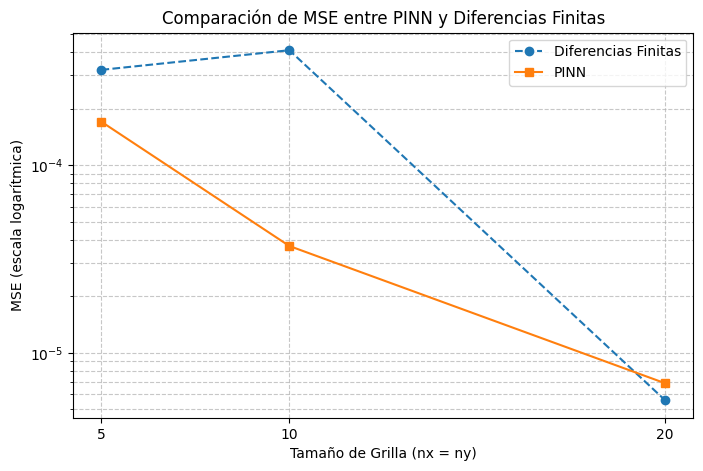

In [15]:
# Calcular MSE para PINN y Diferencias Finitas respecto a la solución exacta
mse_pinn = []
mse_numeric = []

# Assuming u_numeric is a list of solutions corresponding to grid sizes in nx and ny
for i in range(len(u_pinn)):
    # Solución exacta para la grilla correspondiente
    x = np.linspace(0, 1, nx[i])  # Use nx[i] for grid size
    y = np.linspace(0, 1, ny[i])  # Use ny[i] for grid size
    X, Y = np.meshgrid(x, y)
    u_exact = exact_solution(X, Y)

    # Calcular el MSE para PINN
    mse_pinn.append(np.mean((u_pinn[i] - u_exact) ** 2))

    # Calcular el MSE para Diferencias Finitas
    # Extract the relevant portion of u_numeric for the current grid size
    u_numeric_subset = u_numeric[0:nx[i], 0:ny[i]] # Extract a subset matching the current grid

    # Reshape is likely not needed here if u_numeric_subset is already the correct shape
    # u_numeric_reshaped = u_numeric_subset.reshape(u_exact.shape)

    mse_numeric.append(np.mean((u_numeric_subset - u_exact) ** 2))

# Gráfico comparativo con puntos y escala logarítmica en el eje Y
plt.figure(figsize=(8, 5))

grid_sizes = [5, 10, 20]  # Tamaños de las grillas
plt.semilogy(grid_sizes, mse_numeric, marker='o', linestyle='--', label="Diferencias Finitas")
plt.semilogy(grid_sizes, mse_pinn, marker='s', linestyle='-', label="PINN")

plt.xlabel("Tamaño de Grilla (nx = ny)")
plt.ylabel("MSE (escala logarítmica)")
plt.title("Comparación de MSE entre PINN y Diferencias Finitas")
plt.xticks(grid_sizes)
plt.legend()
plt.grid(which="both", linestyle="--", alpha=0.7)
plt.show()

# **(b3). Análisis comparativo entre los métodos:** "Diferencias Finitas y PINNS"

Los resultados obtenidos para la resolución del problema de contorno utilizando FDM y PINN muestran diferencias importantes en términos de precisión, eficiencia y escalabilidad a la hora de resolverlo. A continuación, destacamos los siguientes puntos:

---

**Precisión**

La gráfica que compara el error cuadrático medio (MSE) entre ambos métodos destaca la ventaja de PINNs en términos de precisión. Mientras que el método de diferencias finitas depende significativamente del refinamiento de la grilla para reducir el MSE, el método PINN logra una mayor precisión incluso con grillas menos densas.

- En la grilla 5x5, el método de diferencias finitas presenta un MSE elevado debido a la limitada capacidad de representar adecuadamente la solución analítica con una malla tan dispersa. Por el contrario, PINNs logra un MSE considerablemente menor gracias a la capacidad de las redes neuronales.

- Con la grilla 10x10, PINNs sigue mostrando una ventaja significativa, alcanzando una precisión mucho mayor con un error cuadrático medio mucho más bajo.

- Finalmente, FDM alcanzó su mejor desempeño, reduciendo significativamente el MSE. Sin embargo, el PINN, configurado con arquitecturas como
[2,20,20,1], logra un MSE menor ($10^{-6}$), evidenciando que sigue siendo el método más preciso incluso para grillas finas.

La mayor precisión del método de PINNs frente al método de FDM, radica en varios aspectos fundamentales que destacan sus ventajas en la resolución de problemas de ecuaciones diferenciales parciales (PDEs).

En primer lugar, **PINNs ofrecen una representación continua de la solución en todo el dominio**. La red neuronal utilizada en este método modela \(u(x, y)\) como una función continua, lo que permite capturar relaciones no lineales y gradientes complejos con mayor suavidad. Esto contrasta con el método de diferencias finitas, donde la solución se calcula exclusivamente en los puntos discretos de una grilla, perdiendo detalles entre los nodos. Esta característica hace que PINNs no dependan de una alta resolución en la grilla para alcanzar soluciones precisas, mientras que las diferencias finitas necesitan mallas densas para lograr un rendimiento comparable.

Además, **PINNs optimizan el error de manera global**. La función de pérdida del método combina el residuo de la ecuación diferencial en los puntos internos del dominio con las condiciones de frontera. Este enfoque asegura que la solución sea consistente tanto con la física del problema como con las restricciones impuestas en los bordes. Por otro lado, las diferencias finitas se basan en esquemas locales para aproximar las derivadas, lo que puede llevar a acumulación de errores numéricos, especialmente en regiones con gradientes pronunciados.

Otro aspecto clave es la **independencia de PINNs respecto a la resolución de la grilla**. Aunque la cantidad de puntos de colocación afecta la precisión del modelo, las redes neuronales no necesitan una malla estructurada refinada. Esto se observa claramente en los resultados de las grillas \(5 X 5\), \(10 X 10\) y \(20 X 20\), donde PINNs supera consistentemente a diferencias finitas en términos de error cuadrático medio (MSE), incluso con configuraciones menos densas. En cambio, las diferencias finitas requieren aumentar significativamente la densidad de la malla para mejorar su precisión, lo que incrementa los costos computacionales.

Además, las redes neuronales utilizadas en PINNs son inherentemente no lineales, lo que las hace ideales para **modelar fenómenos complejos**. Activaciones como Tanh permiten capturar discontinuidades y gradientes suaves, lo que mejora la precisión en comparación con esquemas numéricos basados en aproximaciones locales. Las diferencias finitas, aunque efectivas para problemas lineales y sencillos, enfrentan mayores desafíos al tratar con problemas no lineales debido a su naturaleza discreta.

Por último, **PINNs ofrecen una mayor flexibilidad y escalabilidad**. Este método no depende de mallas estructuradas, lo que lo hace aplicable a dominios irregulares y geometrías complejas sin necesidad de modificar la metodología. Por el contrario, diferencias finitas están limitadas a dominios regulares y requieren grillas específicas para cada configuración.

---

**Eficiencia**

El método de diferencias finitas requiere incrementar considerablemente la densidad de la grilla para reducir el error, lo que aumenta los requisitos computacionales y de memoria. En contraste, PINNs permite mantener una grilla menos densa y compensar con arquitecturas más complejas y un proceso de entrenamiento basado en optimización, lo que resulta más eficiente en términos de adaptabilidad.

---

**Escabilidad**

Diferencias finitas está limitado a dominios regulares y grillas estructuradas, lo que dificulta su aplicación en geometrías más complejas o problemas de mayor dimensión. Por el contrario, PINNs, al no depender de una malla estructurada, ofrece una mayor flexibilidad, permitiendo abordar problemas con geometrías complejas, dominios irregulares y múltiples dimensiones sin requerir un cambio significativo en la metodología.

---

**Convergencia**

En términos de convergencia, PINNs muestra un comportamiento robusto. A medida que la arquitectura de la red aumenta en complejidad (por ejemplo, de
[2,3,3,1] a [2,20,20,1]), el modelo es capaz de aprender con mayor rapidez y precisión, como se observa en la evolución de la función de pérdida. En FiPy, la mejora en la solución está estrictamente relacionada con la densidad de la grilla, lo que limita su versatilidad.

---

Por lo tanto, para este problema en particula, PINNs es el método más preciso y versátil, especialmente en casos donde se busca alta resolución o flexibilidad en la definición del dominio.



# **(b4). Análisis comparativo entre los métodos:** "Diferencias Finitas y PINNS"

Con el objetivo de evaluar el impacto de la estructura de la red neuronal propuesta en la obtención de soluciones, se plantean las siguientes configuraciones:

- Grilla 5 x 5 usar una red neuronal [2, 5, 5, 1]
- Grilla 10 x 10 usar una red neuronal [2, 5, 5, 1]
- Grilla 20 x 20 usar una red neuronal [2, 5, 5, 1]

### **Grilla 5 X 5**

In [73]:
# Configuración del problema
grid_size = [5,5,5]
layers = [[2, 3, 3, 1],[2, 5, 5, 1],[2, 10, 10, 1]]  # Estructura de la red neuronal
n_epochs = 8000

In [74]:
# Entrenamos los modelos
u_pinn = []
loss_history = []
for i in range(len(grid_size)):
  print("________________________________________________\n")
  print("Grilla {}x{} - Configuración de {}".format(grid_size[i],grid_size[i],layers[i]))
  print("________________________________________________")

  internal_points, boundary_points, all_points, X, Y = generate_grid_points(grid_size[i])

  # Crear valores exactos para la grilla
  exact_values = exact_solution(X.ravel(), Y.ravel())

  # Reentrenar el modelo con los ajustes
  model = PINN(layers[i])
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

  # Lista temporal para almacenar las pérdidas de esta arquitectura
  current_loss_history = []

  for epoch in range(n_epochs):
      optimizer.zero_grad()
      loss = loss_function_with_grid(model, all_points, exact_values.ravel())
      loss.backward()
      optimizer.step()

      # Guardar la pérdida en cada época
      current_loss_history.append((epoch, loss.item()))

      if epoch % 100 == 0:
          print(f"Epoch {epoch}: Loss = {loss.item()}")

  # Guardar el historial de pérdidas de esta arquitectura
  loss_history.append(current_loss_history)

  # Evaluar nuevamente el modelo en la grilla
  u_pred_adjusted = model(all_points).detach().numpy().reshape(grid_size[i], grid_size[i])
  u_pinn.append(u_pred_adjusted)

________________________________________________

Grilla 5x5 - Configuración de [2, 3, 3, 1]
________________________________________________
Epoch 0: Loss = 0.4279664158821106
Epoch 100: Loss = 0.1412094086408615
Epoch 200: Loss = 0.01640009507536888
Epoch 300: Loss = 0.0034650808665901423
Epoch 400: Loss = 0.0025661983527243137
Epoch 500: Loss = 0.0019505579257383943
Epoch 600: Loss = 0.0015099074225872755
Epoch 700: Loss = 0.0011950759217143059
Epoch 800: Loss = 0.0009706398705020547
Epoch 900: Loss = 0.0008112684008665383
Epoch 1000: Loss = 0.0006986901280470192
Epoch 1100: Loss = 0.0006195943569764495
Epoch 1200: Loss = 0.0005642517935484648
Epoch 1300: Loss = 0.0005255722790025175
Epoch 1400: Loss = 0.000498447916470468
Epoch 1500: Loss = 0.00047925286344252527
Epoch 1600: Loss = 0.0004654538643080741
Epoch 1700: Loss = 0.0004553073667921126
Epoch 1800: Loss = 0.0004476224130485207
Epoch 1900: Loss = 0.00044159271055832505
Epoch 2000: Loss = 0.0004366688372101635
Epoch 2100: Loss

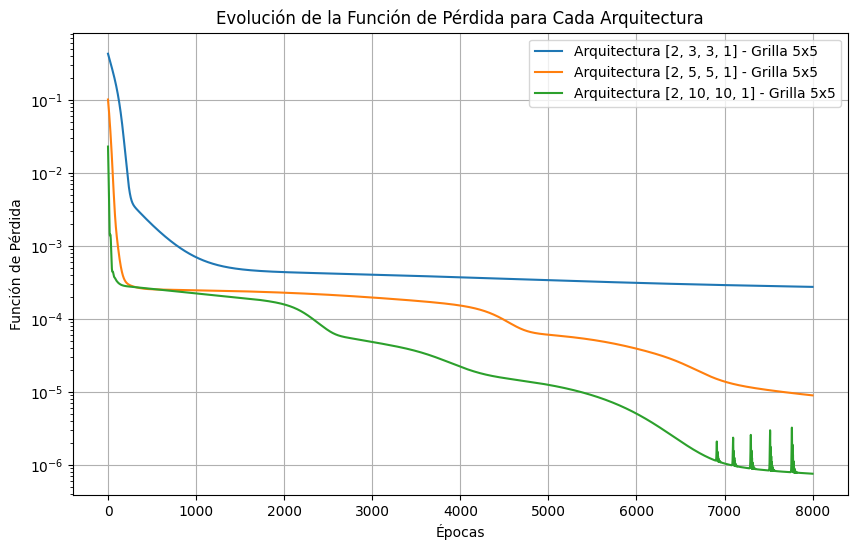

In [75]:
plt.figure(figsize=(10, 6))
for i, loss_data in enumerate(loss_history):
    epochs, losses = zip(*loss_data)  # Separar épocas y pérdidas
    plt.semilogy(epochs, losses, label=f"Arquitectura {layers[i]} - Grilla {grid_size[i]}x{grid_size[i]}")

plt.xlabel("Épocas")
plt.ylabel("Función de Pérdida")
plt.title("Evolución de la Función de Pérdida para Cada Arquitectura")
plt.legend()
plt.grid(True)
plt.show()

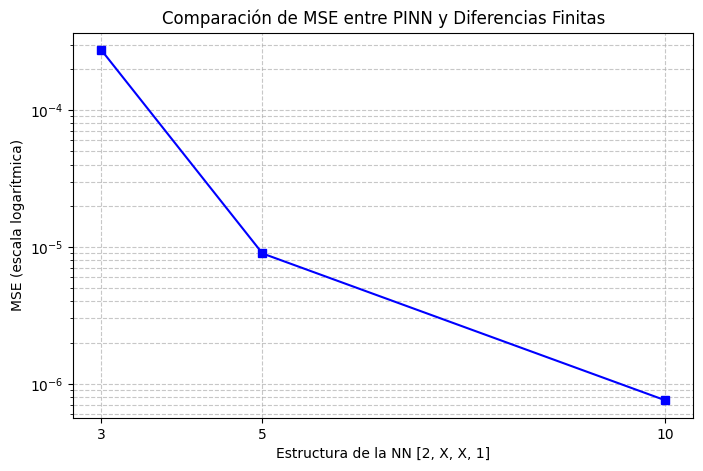

In [76]:
# Calcular MSE para PINN y Diferencias Finitas respecto a la solución exacta
mse_pinn = []

# Solución exacta para la grilla correspondiente
# Use grid_size[i] to generate exact solution for the current grid
x = np.linspace(0, 1, grid_size[0])
y = np.linspace(0, 1, grid_size[0])
X, Y = np.meshgrid(x, y)
u_exact = exact_solution(X, Y)

# Assuming u_numeric is a list of solutions corresponding to grid sizes in nx and ny
for i in range(len(u_pinn)):
    # Calcular el MSE para PINN
    mse_pinn.append(np.mean((u_pinn[i] - u_exact) ** 2))


# Gráfico comparativo con puntos y escala logarítmica en el eje Y
plt.figure(figsize=(8, 5))

grid_sizes = [3, 5, 10]  # Neuronas intermedias
plt.semilogy(grid_sizes, mse_pinn, marker='s', color ='blue', linestyle='-', label="PINN")

plt.xlabel("Estructura de la NN [2, X, X, 1]")
plt.ylabel("MSE (escala logarítmica)")
plt.title("Comparación de MSE entre PINN y Diferencias Finitas")
plt.xticks(grid_sizes)
plt.grid(which="both", linestyle="--", alpha=0.7)
plt.show()

A medida que aumenta el tamaño de las capas, mejora la precisión, aunque el incremento en la capacidad parece estabilizarse entre [2, 5, 5, 1] y [2, 10, 10, 1].

### **Grilla 10 X 10**

In [77]:
# Configuración del problema
grid_size = [10,10,10]
layers = [[2, 5, 5, 1],[2, 10, 10, 1],[2, 15, 15, 1]]  # Estructura de la red neuronal
n_epochs = 8000

In [78]:
# Entrenamos los modelos
u_pinn = []
loss_history = []
for i in range(len(grid_size)):
  print("________________________________________________\n")
  print("Grilla {}x{} - Configuración de {}".format(grid_size[i],grid_size[i],layers[i]))
  print("________________________________________________")

  internal_points, boundary_points, all_points, X, Y = generate_grid_points(grid_size[i])

  # Crear valores exactos para la grilla
  exact_values = exact_solution(X.ravel(), Y.ravel())

  # Reentrenar el modelo con los ajustes
  model = PINN(layers[i])
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

  # Lista temporal para almacenar las pérdidas de esta arquitectura
  current_loss_history = []

  for epoch in range(n_epochs):
      optimizer.zero_grad()
      loss = loss_function_with_grid(model, all_points, exact_values.ravel())
      loss.backward()
      optimizer.step()

      # Guardar la pérdida en cada época
      current_loss_history.append((epoch, loss.item()))

      if epoch % 100 == 0:
          print(f"Epoch {epoch}: Loss = {loss.item()}")

  # Guardar el historial de pérdidas de esta arquitectura
  loss_history.append(current_loss_history)

  # Evaluar nuevamente el modelo en la grilla
  u_pred_adjusted = model(all_points).detach().numpy().reshape(grid_size[i], grid_size[i])
  u_pinn.append(u_pred_adjusted)

________________________________________________

Grilla 10x10 - Configuración de [2, 5, 5, 1]
________________________________________________
Epoch 0: Loss = 0.2854243814945221
Epoch 100: Loss = 0.00490418029949069
Epoch 200: Loss = 0.0009861622238531709
Epoch 300: Loss = 0.000719562463928014
Epoch 400: Loss = 0.0005107574979774654
Epoch 500: Loss = 0.00038362399209290743
Epoch 600: Loss = 0.0003285480779595673
Epoch 700: Loss = 0.00031152143492363393
Epoch 800: Loss = 0.00030682177748531103
Epoch 900: Loss = 0.0003049303777515888
Epoch 1000: Loss = 0.0003036102862097323
Epoch 1100: Loss = 0.0003024057950824499
Epoch 1200: Loss = 0.00030120566952973604
Epoch 1300: Loss = 0.00029997804085724056
Epoch 1400: Loss = 0.00029871531296521425
Epoch 1500: Loss = 0.0002974173112306744
Epoch 1600: Loss = 0.0002960868296213448
Epoch 1700: Loss = 0.000294726574793458
Epoch 1800: Loss = 0.00029333922429941595
Epoch 1900: Loss = 0.00029192768852226436
Epoch 2000: Loss = 0.00029049412114545703
Epoch

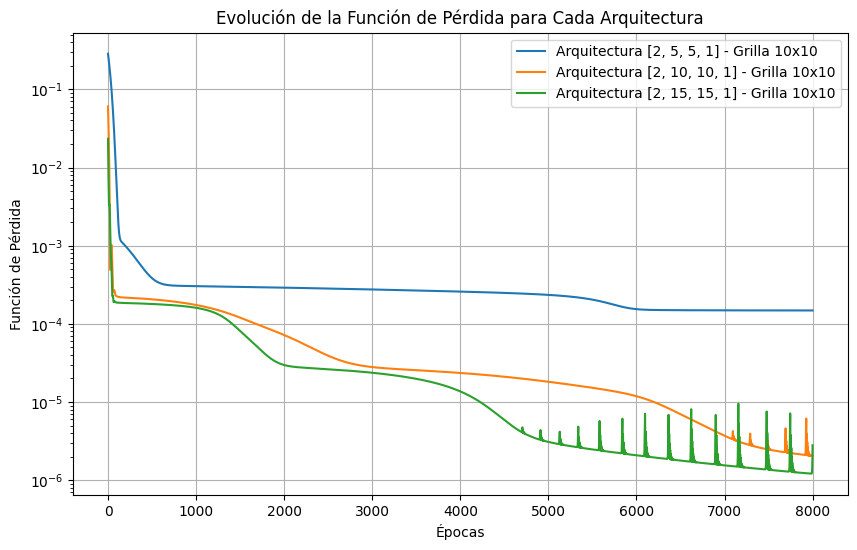

In [79]:
plt.figure(figsize=(10, 6))
for i, loss_data in enumerate(loss_history):
    epochs, losses = zip(*loss_data)  # Separar épocas y pérdidas
    plt.semilogy(epochs, losses, label=f"Arquitectura {layers[i]} - Grilla {grid_size[i]}x{grid_size[i]}")

plt.xlabel("Épocas")
plt.ylabel("Función de Pérdida")
plt.title("Evolución de la Función de Pérdida para Cada Arquitectura")
plt.legend()
plt.grid(True)
plt.show()

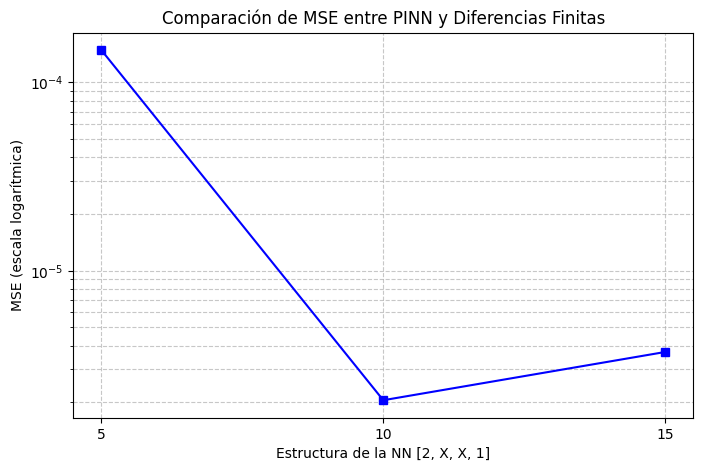

In [80]:
# Calcular MSE para PINN y Diferencias Finitas respecto a la solución exacta
mse_pinn = []

# Solución exacta para la grilla correspondiente
# Use grid_size[i] to generate exact solution for the current grid
x = np.linspace(0, 1, grid_size[1])
y = np.linspace(0, 1, grid_size[1])
X, Y = np.meshgrid(x, y)
u_exact = exact_solution(X, Y)

# Assuming u_numeric is a list of solutions corresponding to grid sizes in nx and ny
for i in range(len(u_pinn)):
    # Calcular el MSE para PINN
    mse_pinn.append(np.mean((u_pinn[i] - u_exact) ** 2))


# Gráfico comparativo con puntos y escala logarítmica en el eje Y
plt.figure(figsize=(8, 5))

grid_sizes = [5, 10, 15]  # Neuronas intermedias
plt.semilogy(grid_sizes, mse_pinn, marker='s', color ='blue', linestyle='-', label="PINN")

plt.xlabel("Estructura de la NN [2, X, X, 1]")
plt.ylabel("MSE (escala logarítmica)")
plt.title("Comparación de MSE entre PINN y Diferencias Finitas")
plt.xticks(grid_sizes)
plt.grid(which="both", linestyle="--", alpha=0.7)
plt.show()

En esta grilla, redes más grandes como [2, 15, 15, 1] son claramente superiores, ya que manejan mejor los detalles adicionales introducidos por la mayor densidad de la grilla.

### **Grilla 20 X 20**

In [87]:
# Configuración del problema
grid_size = [20,20,20]
layers = [[2, 15, 15, 1],[2, 20, 20, 1],[2, 25, 25, 1]]  # Estructura de la red neuronal
n_epochs = 4000

In [88]:
# Entrenamos los modelos
u_pinn = []
loss_history = []
for i in range(len(grid_size)):
  print("________________________________________________\n")
  print("Grilla {}x{} - Configuración de {}".format(grid_size[i],grid_size[i],layers[i]))
  print("________________________________________________")

  internal_points, boundary_points, all_points, X, Y = generate_grid_points(grid_size[i])

  # Crear valores exactos para la grilla
  exact_values = exact_solution(X.ravel(), Y.ravel())

  # Reentrenar el modelo con los ajustes
  model = PINN(layers[i])
  optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

  # Lista temporal para almacenar las pérdidas de esta arquitectura
  current_loss_history = []

  for epoch in range(n_epochs):
      optimizer.zero_grad()
      loss = loss_function_with_grid(model, all_points, exact_values.ravel())
      loss.backward()
      optimizer.step()

      # Guardar la pérdida en cada época
      current_loss_history.append((epoch, loss.item()))

      if epoch % 100 == 0:
          print(f"Epoch {epoch}: Loss = {loss.item()}")

  # Guardar el historial de pérdidas de esta arquitectura
  loss_history.append(current_loss_history)

  # Evaluar nuevamente el modelo en la grilla
  u_pred_adjusted = model(all_points).detach().numpy().reshape(grid_size[i], grid_size[i])
  u_pinn.append(u_pred_adjusted)

________________________________________________

Grilla 20x20 - Configuración de [2, 15, 15, 1]
________________________________________________
Epoch 0: Loss = 0.009147598408162594
Epoch 100: Loss = 0.00024757723440416157
Epoch 200: Loss = 0.0002407274005236104
Epoch 300: Loss = 0.00023256955319084227
Epoch 400: Loss = 0.00022359006106853485
Epoch 500: Loss = 0.00021418336837086827
Epoch 600: Loss = 0.00020464621775317937
Epoch 700: Loss = 0.00019523565424606204
Epoch 800: Loss = 0.00018616100715007633
Epoch 900: Loss = 0.00017750629922375083
Epoch 1000: Loss = 0.00016911671264097095
Epoch 1100: Loss = 0.00016051187412813306
Epoch 1200: Loss = 0.00015084769984241575
Epoch 1300: Loss = 0.00013881604536436498
Epoch 1400: Loss = 0.00012228681589476764
Epoch 1500: Loss = 9.804100409382954e-05
Epoch 1600: Loss = 6.59281067783013e-05
Epoch 1700: Loss = 3.939516318496317e-05
Epoch 1800: Loss = 2.6939664167002775e-05
Epoch 1900: Loss = 2.2783155145589262e-05
Epoch 2000: Loss = 2.156802656827

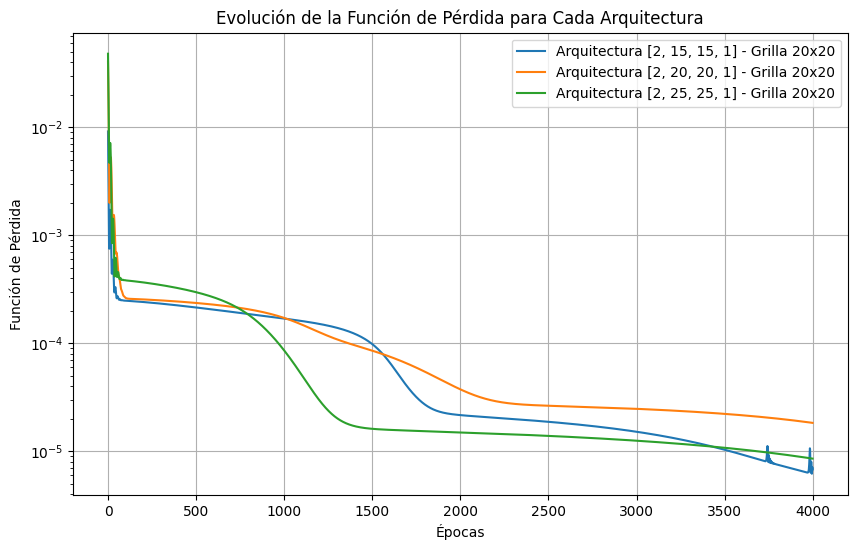

In [89]:
plt.figure(figsize=(10, 6))
for i, loss_data in enumerate(loss_history):
    epochs, losses = zip(*loss_data)  # Separar épocas y pérdidas
    plt.semilogy(epochs, losses, label=f"Arquitectura {layers[i]} - Grilla {grid_size[i]}x{grid_size[i]}")

plt.xlabel("Épocas")
plt.ylabel("Función de Pérdida")
plt.title("Evolución de la Función de Pérdida para Cada Arquitectura")
plt.legend()
plt.grid(True)
plt.show()

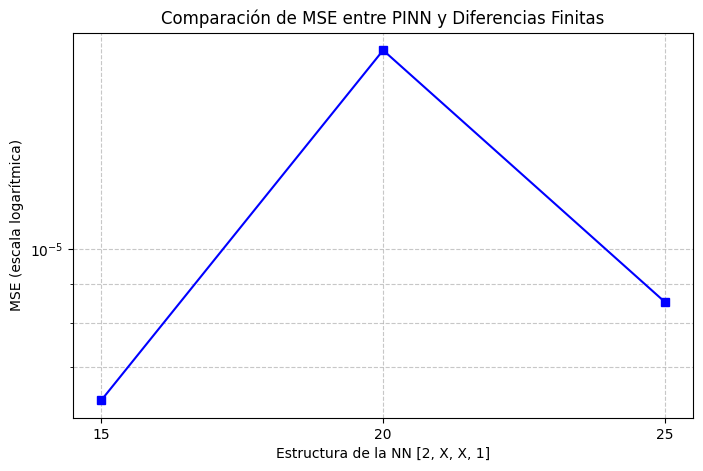

In [90]:
# Calcular MSE para PINN y Diferencias Finitas respecto a la solución exacta
mse_pinn = []

# Solución exacta para la grilla correspondiente
# Use grid_size[i] to generate exact solution for the current grid
x = np.linspace(0, 1, grid_size[2])
y = np.linspace(0, 1, grid_size[2])
X, Y = np.meshgrid(x, y)
u_exact = exact_solution(X, Y)

# Assuming u_numeric is a list of solutions corresponding to grid sizes in nx and ny
for i in range(len(u_pinn)):
    # Calcular el MSE para PINN
    mse_pinn.append(np.mean((u_pinn[i] - u_exact) ** 2))


# Gráfico comparativo con puntos y escala logarítmica en el eje Y
plt.figure(figsize=(8, 5))

grid_sizes = [15, 20, 25]  # Neuronas intermedias
plt.semilogy(grid_sizes, mse_pinn, marker='s', color ='blue', linestyle='-', label="PINN")

plt.xlabel("Estructura de la NN [2, X, X, 1]")
plt.ylabel("MSE (escala logarítmica)")
plt.title("Comparación de MSE entre PINN y Diferencias Finitas")
plt.xticks(grid_sizes)
plt.grid(which="both", linestyle="--", alpha=0.7)
plt.show()

En grillas grandes, arquitecturas como [2, 20, 20, 1] y [2, 25, 25, 1] destacan por su capacidad de modelado, aunque hay que monitorear cuidadosamente el sobreajuste.



**Relación entre el Tamaño de la Grilla y el Número de Capas Intermedias**

El rendimiento de las PINN está directamente influenciado tanto por el tamaño de la grilla como por la arquitectura de la red, particularmente el número de capas intermedias y la cantidad de neuronas. Estas dos dimensiones determinan la capacidad del modelo para capturar patrones complejos y aproximar soluciones precisas para diferentes configuraciones del problema.

**Tamaño de la Grilla y su Impacto**

En grillas pequeñas, como las de tamaño \(5 X 5\), hay pocos puntos de colocación disponibles. Esto significa que el problema presenta menos patrones que la red necesita aprender, lo que permite que arquitecturas más simples, como [2, 5, 5, 1] o [2, 10, 10, 1], sean suficientes. Las redes más grandes en este contexto no aportan mejoras significativas, ya que no hay suficiente información en los datos para justificar una mayor complejidad.

A medida que se aumenta el tamaño de la grilla, como en el caso de \(10 X 10\) o \(20 X 20\), se incrementa el número de puntos de colocación, lo que añade complejidad al problema. Las grillas más densas permiten capturar gradientes y detalles más precisos de la solución analítica, pero esto también requiere redes más capaces para modelar esta información. En este contexto, arquitecturas con más capas y neuronas, como [2, 15, 15, 1] o [2, 20, 20, 1], son necesarias para aprovechar al máximo la información proporcionada por la grilla.

**Importancia del Número de Capas Intermedias**

A priori, se observa una relación entre el número de capas intermedias con el tamaño de la grilla. Con pocas capas (1 o 2), el modelo tiene una capacidad limitada y tiende a subajustar, especialmente en grillas de mayor densidad, donde los patrones son más detallados. Sin embargo, estas arquitecturas simples son suficientes para grillas pequeñas debido a la menor complejidad del problema.

A medida que se añaden más capas y neuronas, como en las configuraciones de 3 o más capas, la red gana capacidad para modelar patrones más complejos. Este diseño es especialmente efectivo en grillas intermedias y grandes, donde se requiere un equilibrio entre la capacidad de modelado y la eficiencia computacional. No obstante, en casos de grillas grandes (\(20 X 20\)), las redes excesivamente profundas pueden llevar a problemas de sobreajuste, especialmente si no se implementan técnicas adecuadas de regularización.

# **Parte 2**
---
### Problema No Lineal